Results show that the optimal solution is likely [0.18879063981746194, 0.3420116728566099], with a cost of -41.97

In [1]:
import skopt
from smallCombinerBigMagnets import *

In [2]:
#sol=compute_Sol(5e-6,100.0,2000,100) 

starting
1 [0.04501643276226002, 0.11758916788293695] 0.9383983666507288 2.5598504023221347
2 [0.16917675829966325, 0.34739996926549566] 27.301664489399393 99.89478979567879
3 [0.2970600191063177, 0.22610201467315247] 1.198040141054475 2.9914563072403717
4 [0.38611018540089037, 0.372845905004511] 1.3050451980634743 3.4569479411159034
5 [0.03887696200874753, 0.054301296685422315] 0.8152987074338884 2.4621792569564005
6 [0.012899267315573093, 0.04042278964266932] 0.6487472364370231 2.0218891881350882
7 [0.4487496816689085, 0.008981750897343885] 0.6743254077374417 1.5206415734160086
8 [0.49656808164382105, 0.07934789442491663] 1.8254275553719364 10.462180246079832
9 [0.2223661122302843, 0.4535647198894147] 1.5323087774832203 5.999934305750275
10 [0.13789722353878742, 0.13144085553831777] 1.411411907733524 17.00039145125682
11 [0.4178972608805503, 0.28078798444360437] 2.6383691376599336 14.461623808260027
12 [0.3001443565078265, 0.03739867646335078] 1.0170930587389677 2.457585061501853
13 

<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

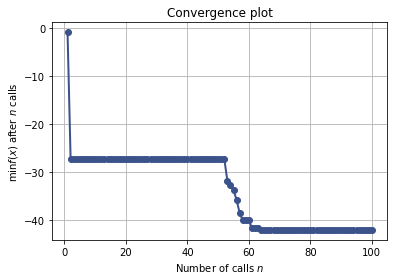

In [3]:
import skopt.plots
skopt.plots.plot_convergence(sol)

array([[<AxesSubplot:xlabel='$X_{0}$', ylabel='Partial dependence'>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='$X_{0}$', ylabel='$X_{1}$'>,
        <AxesSubplot:xlabel='$X_{1}$', ylabel='Partial dependence'>]],
      dtype=object)

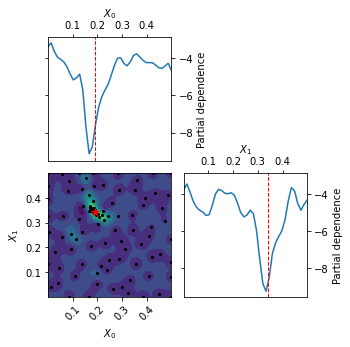

In [4]:
skopt.plots.plot_objective(sol)

In [6]:
sol.fun

-41.96979336296559

In [2]:
lattice=get_Lattice()

In [6]:
optimizer=Optimizer(lattice)
swarm = optimizer.initialize_Random_Swarm_At_Combiner_Output(3e-3,5e0,100)
swarm=optimizer.trace_Swarm_Through_Lattice(swarm,5e-6,.5*lattice.totalLength/lattice.v0Nominal,parallel=True)

In [7]:
for particle in swarm.particles:
    print(particle.currentElIndex)

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
